# Microsoft Movie Studio Proposal


**Authors:** Juan Acosta, Holly Gultiano, and Jon McCaffrey
***

## Overview

Our project presents current trends in the film market. Using exploratory and expository data analysis techniques in Python, we are able to give Microsoft Movie Studio recommendations on the most popular and profitable genres of film, and how Microsoft could use its own intellectual property to expand into the growing market of video game inspired movies.


## Business Challenge

Microsoft is starting a movie studio (in this hypothetical example) and are looking to make significant impact as soon as possible in this sector. Our group's aim is to give actionable direction for them to go with this project, driven by real world data from the film industry. These included such data as viewer statitics and revenue, since they are the strongest indicators of success in the entertainment industry.

## Data Understanding

Our sources of data included IMDB, Box Office Mojo, The Movie Database, The-Numbers Movie Budgets, and Netflix. The variables we found to be most useful are box office revenue, genre IDs, user ratings, total viewer counts, and hours watched for streaming content. For numeric variables, we use summed totals and statistical measures such as averages, and categorical data was cleaned and organized to make it smoothly operable with the numerical data.

In [99]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### TMDB Dataset

In [100]:
df_tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Box Office Mojo Dataset

In [101]:
pd.read_csv('./zippedData/bom.movie_gross.csv.gz').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### The-Numbers Movie Budgets Dataset

In [102]:
pd.read_csv('./zippedData/tn.movie_budgets.csv.gz').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Netflix Dataset

[Top viewed Netflix content globally](https://top10.netflix.com/data/all-weeks-global.tsv)

In [103]:
pd.read_csv('./zippedData/all-weeks-global.tsv', delimiter='\t').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   week                        2600 non-null   object
 1   category                    2600 non-null   object
 2   weekly_rank                 2600 non-null   int64 
 3   show_title                  2600 non-null   object
 4   season_title                1267 non-null   object
 5   weekly_hours_viewed         2600 non-null   int64 
 6   cumulative_weeks_in_top_10  2600 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 142.3+ KB


### Kaggle Video game Dataset

[video_game_films.csv at Kaggle.com](https://www.kaggle.com/datasets/bcruise/film-adaptations-of-video-games)

In [104]:
pd.read_csv('./zippedData/video_game_films.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    42 non-null     object 
 1   Release date             42 non-null     object 
 2   Worldwide box office     42 non-null     float64
 3   Rotten Tomatoes          40 non-null     float64
 4   Metacritic               38 non-null     float64
 5   Distributor              42 non-null     object 
 6   Original game publisher  42 non-null     object 
dtypes: float64(3), object(4)
memory usage: 2.4+ KB


## Data Preparation


### The Movie Data Base
- Able to sort by highest vote average, with conditional of movies with >10,000 vote counts
- Then connected that to genre_ids category.
- Found short list of what numbers in genre_ids translate too. Did not investigate API for full list
- Started comparisons using 'popularity' and 'vote_count' at the end

In [105]:
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Sorting the TMDB table by 'Vote Average'

In [106]:
top_vote_avg = df_tmdb.sort_values('vote_average', ascending=False)
top_vote_avg

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
11018,11018,[],124727,en,Darkchylde,0.600,2013-08-09,Darkchylde,0.0,1
14168,14168,[],167531,en,Summer Snow,0.600,2014-07-25,Summer Snow,0.0,1
14167,14167,"[99, 10402]",221918,en,Butch Walker: Out of Focus,0.600,2014-08-05,Butch Walker: Out of Focus,0.0,1
20601,20601,"[18, 35]",448105,en,The Angry Man,0.600,2017-04-08,The Angry Man,0.0,1


Sorting by a vote count greater than 10,000 and a vote average greater than 7. Reason for doing that is to find the most widely-seen movies with the highest ratings.

In [107]:
top_votes = top_vote_avg.loc[(top_vote_avg['vote_count'] > 10000) & (top_vote_avg['vote_average'] > 7)]
top_votes = top_votes.sort_values('vote_average', ascending=False)

In [108]:
top_votes = top_votes.drop_duplicates(subset='title')

In [109]:
top_20_votes = top_votes[:20] #Selecting out the top 20 of that list
top_20_votes


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
2472,2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160
19,19,"[18, 53, 9648]",11324,en,Shutter Island,18.060,2010-02-18,Shutter Island,8.1,12625
2471,2471,"[10751, 14, 12]",12445,en,Harry Potter and the Deathly Hallows: Part 2,29.206,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
11026,11026,"[36, 18, 53, 10752]",205596,en,The Imitation Game,33.078,2014-12-19,The Imitation Game,8.1,10396
5189,5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725
14184,14184,"[18, 35, 16, 10751]",150540,en,Inside Out,24.797,2015-06-19,Inside Out,8.0,12691
11027,11027,"[9648, 53, 18]",210577,en,Gone Girl,31.215,2014-10-03,Gone Girl,7.9,10459


Determining movie popularity based on TMDB 'popularity' metric for movies with popularity greater than 40 and vote count greater than a 1000

In [110]:
most_popular = top_vote_avg.loc[(top_vote_avg['popularity'] > 40) & (top_vote_avg['vote_count'] > 1000)]
most_popular = most_popular.sort_values('popularity', ascending=False)

In [111]:
most_popular = most_popular.drop_duplicates(subset='title')

In [112]:
most_popular_twenty = most_popular[:20] #top 20 from most popular table
most_popular_twenty

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626
20618,20618,"[28, 12, 878, 18]",315635,en,Spider-Man: Homecoming,46.775,2017-07-07,Spider-Man: Homecoming,7.4,11585


### The-Numbers Movie Budgets Dataset

- TN Dataset contains box-office perfonance data for all movies with the exception of its respective genre.
- After Cleaning the dataset, merged TN and TMDB, and Genre ID for each movie could be asociated with its own box-office data.

In [113]:
df_tn = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

Transform all numeric columns from object to int

In [114]:
#Removing all commas and $ signs from production_budget column
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',','')
df_tn['production_budget'] = df_tn['production_budget'].str.replace('$','')

#Removing all commas and $ signs from domestic_gross column
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',','')
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('$','')

#Removing all commas and $ signs from worldwide_gross column
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',','')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$','')


In [115]:
#Converting values from str to int
df_tn['production_budget'] = df_tn['production_budget'].astype(int)
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype(int)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype(int)

Creating a new column for gross profit, substracting production budget from total worldwide_gross

In [116]:
df_tn['gross_profit']= df_tn['worldwide_gross'] - df_tn['production_budget']

In [117]:
df_tn['gross_profit_by_millions'] = df_tn['gross_profit']/10000

#### Merging two data frames to get genre column into frame with movies earnings

Merging TMDB and TN data frames, TMDB contains movie's genres column and TN has gross profit information, by merging the two frames we can find which generes had better results in the box office.

In [118]:
#set movie column as index, therefore both dataframes can merge based on matching values from its respective index
df_tmdb_2 = df_tmdb.set_index(['title'])
df_tn.set_index(['movie'], inplace= True)

In [119]:
merged_df = df_tn.merge(df_tmdb_2, how = 'inner', left_index=True, right_index=True)


In [120]:
# Droping columns with missing info
merged_df.loc[merged_df['genre_ids'] == '[]', 'genre_ids'] = None

merged_df = merged_df.dropna(subset=['genre_ids'])

Changing values for each genre id number to its respective name

In [121]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('12', 'Adventure')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('28', 'Action')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('16', 'Animation')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('35', 'Comedy')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('80', 'Crime')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('99', 'Documentary')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('18', 'Drama')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10751', 'Family')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('14', 'Fantasy')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('36', 'History')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('27', 'Horror')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10402', 'Music')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('9648', 'Mystery')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10749', 'Romance')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('878', 'Science Fiction')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10770', 'TV Movie')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('53', 'Thriller')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10752', 'War')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('37', 'Western')

#### Save as new file

In [122]:
# df.to_csv('Merged_df_TMDB_TN.csv')

In [123]:
df_TMDB_TN = pd.read_csv('./Notes/Merged_df_TMDB_TN.csv')

Determining top 20 movies based on highest profit at the Box-office

In [124]:
df_top_movies = df_TMDB_TN.sort_values(by=['gross_profit_by_millions'], ascending=False).head(20)

## What About Streaming?

According to a [report by the Motion Picture Association](https://www.motionpictures.org/wp-content/uploads/2022/03/MPA-2021-THEME-Report-FINAL.pdf), revenue from films released digitally through streaming services such as Netflix, Hulu, Disney+, and Amazon Prime Video increased by **11% in the US** and **24% internationally** from 2020 to 2021. The total revenue generated in 2021 from digital releases globally was **$72 Billion**

In [125]:
box_rev = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
box_rev['total_gross'] = box_rev['domestic_gross'] + box_rev['domestic_gross']
box_rev.head()

box_rev_17_18 = box_rev[(box_rev.year == 2017) | (box_rev.year == 2018)] # unfortunately our data for box office revenue only goes up to the end of 2018
total_box_rev_17_18 = box_rev_17_18['total_gross'].sum()

total_digi_rev_17_18 = 66300000000 # from report numbers, digital 2017 + 2018, international + US

total_digi_rev_17_18 - total_box_rev_17_18

22251047806.0

### Streaming Revenue is Higher Than Box Office Revenue

Even in 2017 & 2018, before people were spending more time at home from the pandemic, streaming revenue was **$22.25 billion more** than box office revenue (according to the Motion Picture Association report above)

In [126]:
netflix = pd.read_csv('./zippedData/all-weeks-global.tsv', delimiter='\t') # time frame for this dataset is 6/28/21 to 9/25/22
nf_movies = netflix[netflix['category'].str.contains('Film')]
nf_movies

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-09-25,Films (English),1,Do Revenge,NaN,42550000,2
1,2022-09-25,Films (English),2,Lou,NaN,40570000,1
2,2022-09-25,Films (English),3,Father Stu,NaN,13770000,1
3,2022-09-25,Films (English),4,I Used to Be Famous,NaN,11630000,1
4,2022-09-25,Films (English),5,A Jazzman's Blues,NaN,7820000,1
...,...,...,...,...,...,...,...
2575,2021-07-04,Films (Non-English),6,Security,NaN,2950000,1
2576,2021-07-04,Films (Non-English),7,Murder by the Coast,NaN,2690000,1
2577,2021-07-04,Films (Non-English),8,Xtreme,NaN,2650000,1
2578,2021-07-04,Films (Non-English),9,Rurouni Kenshin: Origins,NaN,2150000,1


Narrowing down the table to only the top movies

In [127]:
top_movies = nf_movies[['show_title','weekly_hours_viewed']].sort_values(by='weekly_hours_viewed', ascending=False)
top_movies.drop_duplicates(subset='show_title', inplace=True)
top100 = top_movies[0:100]
top20 = top_movies[0:20]
top30 = top_movies[0:30]
top50 = top_movies[0:50]

Preparation for a second plot showing top 20 most viewed generes

In [128]:
top20_genres = ['Comedy', 'Action', 'Music', 'Action', 'Action', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Documentary', 'Action', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Action', 'Action'] 
# hard coded from Netflix's website listing for each movie or IMDB, since Netflix's provided .tsv didn't include genre. Romatic Comedy coded here as Comedy
len(top20_genres)

top20['genre'] = top20_genres

<ipython-input-128-17641bfe3b40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20['genre'] = top20_genres


# Video Game Movies


We found a DataSet of movies based on video games, and sorted them by worldwide box-office

In [129]:
df_vid_game = pd.read_csv('./zippedData/video_game_films.csv')

In [130]:
vid_games_box_off = df_vid_game.sort_values('Worldwide box office', ascending=False)
vid_games_plt_data = vid_games_box_off[:20]


## Data Modeling


Plot below shows top 20 movies based on average rating
- Blue: Action/Adventure
- Black: Other

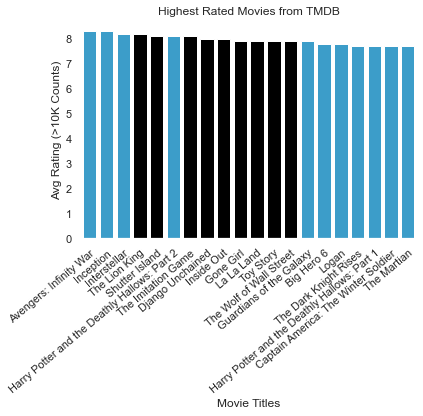

In [131]:
# code for plot used on Action/Adventure slide

ax = sns.barplot(data=top_20_votes, x='original_title', y='vote_average', 
                 palette = ['#25a6e0', '#25a6e0', '#25a6e0', 'black', 'black', '#25a6e0', 'black', 'black', 'black', 'black',
                           'black', 'black', 'black', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0'])

sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Avg Rating (>10K Counts)')
ax.set_title('Highest Rated Movies from TMDB');

#plt.savefig('./zippedData/highest rated movies from TMDB action adv', bbox_inches='tight', dpi=300);

Plot below shows top 20 movies based on box-office profit

Blue: Action
Magenta: Comedy
Black: Other

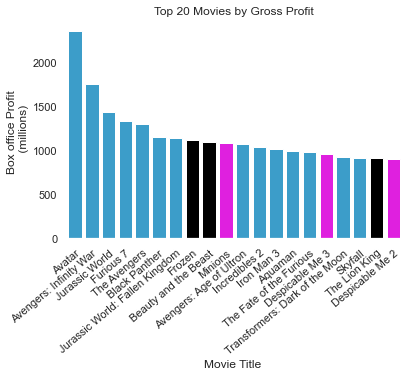

In [132]:
ax = sns.barplot( x=df_top_movies['original_title'], y=df_top_movies['gross_profit_by_millions'], palette = (['#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', 'black', 'black', 'magenta', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', 'magenta', '#25a6e0', '#25a6e0', 'black', 'magenta']), ci=None )



ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_ylabel('Box office Profit \n (millions)')
ax.set_xlabel('Movie Title ')
ax.set_title('Top 20 Movies by Gross Profit');
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})

#plt.savefig('../zippedData/Top_20_Movies_by_Gross_Profit_2', bbox_inches='tight', dpi=300);
# plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

Plot below shows top 20 movies based on average rating
- Green: Drama
- Black: Other

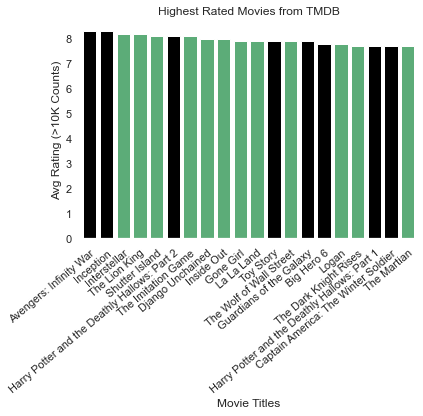

In [133]:
# code for plot used on drama slide

ax = sns.barplot(data=top_20_votes, x='original_title', y='vote_average', palette = ['black', 'black', '#4fb974', '#4fb974', '#4fb974', 'black', '#4fb974', '#4fb974', '#4fb974', '#4fb974',
                                                                                    '#4fb974', 'black', '#4fb974', 'black', 'black', '#4fb974', '#4fb974', 'black', 'black', '#4fb974'])

sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Avg Rating (>10K Counts)')
ax.set_title('Highest Rated Movies from TMDB');

# plt.savefig('./zippedData/highest rated movies from TMDB drama', bbox_inches='tight', dpi=300);

Plot below shows top 20 movies based on average rating

- Magenta: Comedy
- Black: Other

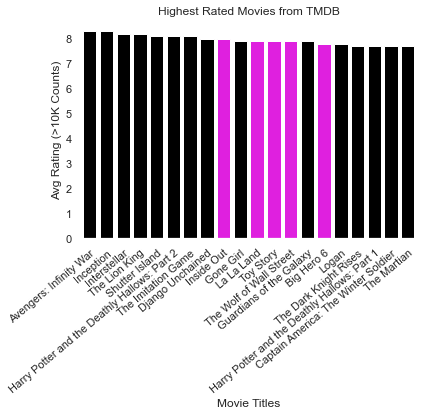

In [134]:
# code for comedy plot

ax = sns.barplot(data=top_20_votes, x='original_title', y='vote_average', palette = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'magenta', 'black',
                                                                                    'magenta', 'magenta', 'magenta', 'black', 'magenta', 'black', 'black', 'black', 'black', 'black'])

sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Avg Rating (>10K Counts)')
ax.set_title('Highest Rated Movies from TMDB');

#plt.savefig('./zippedData/highest rated movies from TMDB comedy', bbox_inches='tight', dpi=300);

&nbsp;

&nbsp; 

Plot below demonstrates that all of the top 20 movies in the TMDB popularity category are Action movies

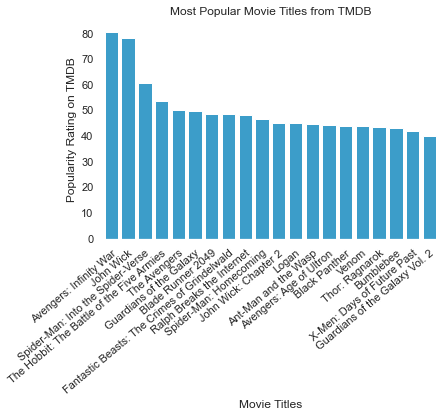

In [135]:
# code for TMDB 'popularity' stats - ALL in action/adventure genre
ax = sns.barplot(data=most_popular_twenty, x='original_title', y='popularity', color='#25a6e0')

sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Popularity Rating on TMDB')
ax.set_title('Most Popular Movie Titles from TMDB');
# plt.savefig('./zippedData/most popular movie titles from TMDB', bbox_inches='tight', dpi=300);

In [136]:
top20_palette = ['magenta', '#25a6e0', 'black', '#25a6e0', '#25a6e0', 'magenta', '#4fb974', 'magenta', '#4fb974', 'magenta', 'magenta', '#25a6e0', 'black', '#25a6e0', '#25a6e0', 'magenta', 'magenta', 'magenta', '#25a6e0', '#25a6e0' ] 
# '#25a6e0' is action, magenta comedy, '#4fb974' drama, black for others (so, music, documentary)

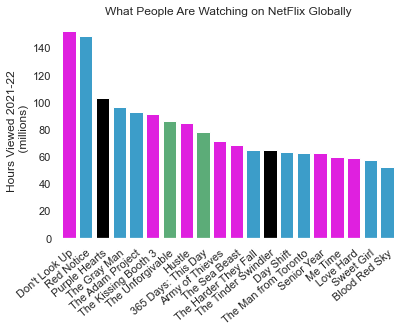

In [137]:
ax = sns.barplot(data=top20, x='show_title', y=top20['weekly_hours_viewed'] / 1000000, palette=top20_palette, dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_ylabel('Hours Viewed 2021-22 \n (millions)')
ax.set_xlabel('')
ax.set_title('What People Are Watching on NetFlix Globally')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # this turns of scientific notation for numerical vals

sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
plt.show();
# plt.savefig('./../Data/netflix_top20_titles_hours.png', bbox_inches='tight');

### The top two movies have significantly more views that the rest
*why is that?*

&nbsp;

The blurb about Netflix's \#1 film, "Don't Look Up" https://www.dontlookup-movie.com/synopsis/
>Two astronomers go on a media tour to warn humankind of a planet-killing comet hurtling toward Earth. The response from a distracted world: Meh.

Compared with Netflix's description of "Red Notice" https://www.netflix.com/title/81161626
>An FBI profiler pursuing the world's most wanted art thief becomes his reluctant partner in crime to catch an elusive crook who's always one step ahead.

The two don't seem to have much in common, story-wise.

&nbsp;

&nbsp;


### Genre as a Driver of Interest

Let's look at the genres of the top 20 streamed movies in the 2021-2022 span
&nbsp;

&nbsp;

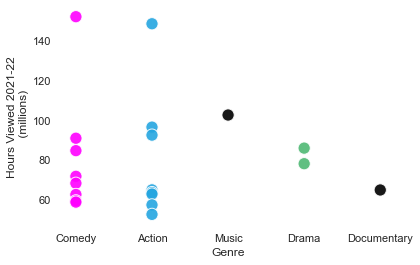

In [138]:
ax = sns.scatterplot(x=top20['genre'], y=top20['weekly_hours_viewed'] / 1000000, hue=top20['genre'], palette=['magenta', '#25a6e0', 'black', '#4fb974', 'black'], legend=False, s=150, alpha=0.90)
# ax.bar(top20['genre'], top20['weekly_hours_viewed'], width=width, bottom=0.0, color='red', alpha=0.5)
ax.set_ylabel('Hours Viewed 2021-22 \n (millions)')
ax.set_xlabel('Genre')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})

# plt.savefig('./../Data/top20_genres.png', bbox_inches='tight');
plt.show();

The number of dots represent the different movies. We can see that both in total hours watched and number movies in each genre, **comedy** and **action** are the most represented genres

Our other datasets included data on films up til 2019. In those, comedy was farther from the top spot. Did the need to laugh increase after 2020?

Netflix also represents at-home viewing. Streaming is a different market than box-office. If Microsoft Movie Studio is planning a streaming service or delivering content to viewers at home, comedy should be something to consider

&nbsp;
### Film adaptations of video games, sorted by worldwide box-office
&nbsp;

Text(0.5, 1.0, 'Video Game Movies Worldwide Box Office')

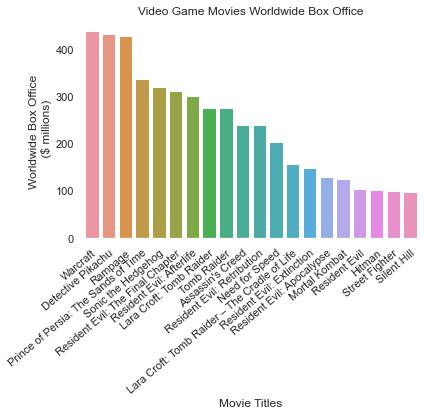

In [139]:
ax = sns.barplot(data=vid_games_plt_data, x='Title', y=vid_games_plt_data['Worldwide box office'] / 1000000)

sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Worldwide Box Office \n ($ millions)')
ax.set_title('Video Game Movies Worldwide Box Office')
# plt.savefig('./zippedData/video game movies worldwide box office', bbox_inches='tight', dpi=300);

## Evaluation

Our analysis suggests the most impactful genres over all datasets spanning a wide time range were Action-Adventure and Drama. Using very recent data from streaming film statistics, we note that the current trends indicate a shift towards an increase in demand for Comedy films. As people's preference for movie viewing has shifted more towards streaming at home and on mobile devices, the trend for Comedy preference could be interpreted as translating better to small-screen viewing, as opposed to Action-Adventure films being more suited to big screen theatrical releases due to their highly sensory nature. One striking and relevant indication we discovered is the strong box office return for movies based on video game franchises. This seems like a natural outlet for Microsoft, given the large quantity of popular video game titles in Microsoft's product library.

## Conclusions

Based on the consistent high performance of Action-Adventure and Drama films over time, and knowing the high returns on previous video game films, Microsoft should consider basing their initial movie studio production in their well regarded video game titles corresponding to these genres. The possible shift towards an interest in comedy is something to be further explored, and incorporated in order to be ahead of the curve on changes in viewership trends. Future predictive analysis beyond the scope of our project would be advised in this area, as our streaming data only spanned one year's time. There is also an untapped potential of utilizing Microsoft's knowledge and technology base in VR/AR to further enhance movie viewer immersion, as well as blending patronage across product market bases.